##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 1 DO LABORATORIUM 2</style></h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</style></h1>
    <h1 style = "font-size:24px">Klasyfikacja nadzorowana</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Klasyfikacja z użyciem Maszyny Wektorów Nośnych (SVM) - przykłady</h3>
    <h3 style = 
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 1

Maszyna Wektorów Nośnych (SVM) jest wszechstronnym modelem uczenia maszynowego za pomocą którego można dokonywać klasyfikacji zaróno liniowej jak i nieliniowej, regresji oraz detekcji elementów odstających. Główne zastosowanie SVM to klasyfikacja złożonych lecz niewielkich zbiorów danych.

Dokładny sposób działania SVM został przedstawiony w ramach wykładów z przedmiotu Uczenie maszynowe:
>wykład nr 7: https://enauczanie.pg.edu.pl/moodle/pluginfile.php/1174537/mod_resource/content/2/uczenie_maszynowe_7_rozszerzone.pdf  

>wykład nr 8: https://enauczanie.pg.edu.pl/moodle/pluginfile.php/1184214/mod_resource/content/1/uczenie_maszynowe_8_rozszerzone.pdf

<p>Oraz w materiałach pomocnicznych do wykładów:<p>

>Wprowadzenie do SVM - wektory nośne, wyznaczanie marginesów: 
https://colab.research.google.com/drive/1usd-0v8DUUx70TvyZGzFe66ZiC3MYxR2?usp=sharing

>Sztywne marginesy w SVM, prosta implementacja z użyciem Scikit_learn: https://colab.research.google.com/drive/1iq5UPWD1NLgL62SUUlyVq6sl3HvXw9QE?usp=sharing

>Miękki margines oraz różne funkcje jądra SVM: https://colab.research.google.com/drive/1g64Y1b6WCWS-GmK6yq5D1hraiHHKQmlm?usp=sharing

> Porównanie regresji logistycznej z SVM, podejście mutliklasowe do klasyfikacji z użyciem SVM: https://colab.research.google.com/drive/1EIIrzzg8i5RF8ZySi0ZKqWQDUP_u1bmE?usp=sharing

W tym przykładzie skupimy się na zastosowaniu SVM do klasyfikacji. W tym celu wykorzystamy znany z wykładów zbiór danych dotyczący diagnostyki nowotworów piersi



Najpierw dokonujemy załadowania bibliotek niezbędnych do uruchomienia ćwiczenia.

In [2]:
#Import bilbioteki scikit-learn i modułu dataset zawierającego zbiory danych 
from sklearn import datasets
# Zaimporotwanie funkcji train_test_split do podziału zbioru na dane trenignowe i testowe 
from sklearn.model_selection import train_test_split
# Zaimporotowanie modelu SVM z packietu sklearn 
from sklearn import svm
#Import modułu metrics z pakietu scikit-learn do policzenia miary dokładności klasyfikatora
from sklearn import metrics
# Import modułów potrzebnych do tworzenia grafiki i obliczeń
import numpy as np #import biblioteki numpy do obliczeń
import pandas as pd # import biblioteki pandas do przetwarzania danych
import matplotlib.pyplot as plt #import biblioteki matplotlib i modułu pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns #import biblioteki seaborn do tworzenia wykresów
from mpl_toolkits.mplot3d import Axes3D # import biblioteki potrzebnej do wizualizacji 3D
from sklearn.decomposition import PCA # import biblioteki niezbędnej do przeprowadzenia redukcji wymiarowości z użyciem PCA
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC


Dokonujemy ładowania danych, wyświetlamy nazwy cech oraz etykiet

In [3]:
#Załadowanie zbioru danych
dataset = datasets.load_breast_cancer() #datasets.load_iris() #datasets.load_breast_cancer() #datasets.load_wine() #load_breast_cancer()

# Wypisanie zbioru nazw cech ze zbioru danych ( w tym przypadku 13 cech)
print("Features: ", dataset.feature_names)

#Wypisanie etykiet zawierających typy raka: "złośliwy", "łagodny" 
print("Labels: ", dataset.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Sprawdzamy jak wyglądają wartości numeryczne danych poprzez wypisanie kształtu wektora danych oraz kilku pierwszych wartośći oraz wartości etykiet.

In [4]:
# Wypisanie kształtu danych (cech) ze zbioru 
print("Kształt wektora danych",dataset.data.shape)
# Wypisanie wartości dla 5 pierwych wpisów w danych 
print("Wartości pierwszych 5 rekordów:",dataset.data[0:1])
# Wypisanie etykiet oznaczających nowotwór (0:złośliwy, 1:łagodny)
print("Etykiety danych:",dataset.target)

Kształt wektora danych (569, 30)
Wartości pierwszych 5 rekordów: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
Etykiety danych: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1

Następnie dokonywany jest podział zbioru na dane testow i treningowe z wykorzystaniem polecenia


```
# X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30,random_state=109)
```
Należy zwrócić uwagę na parametr
```
# test_size=0.30
```
Poprzez który ustalana jest wielkość zbioru testowego oraz treningowego, wartość 0.30 oznacza 30% zbioru testowego i 70% zbioru treningowego.

Dla sprawdzenia czy podział został dokonany poprawnie wyśtwietlamy wartości dla wszystkich podzielonych zbiorów.

In [5]:
# Podział zbioru na dane treningowe i testowe 
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.10,random_state=109) # Rozmiar zbiorów to 70% treningowy i 30% testowy
print("zbiór trenignowy:", X_train)
print("zbiór trenignowy - etykiety:", y_train)
print("zbiór testowy:", X_test)
print("zbiór testowy - etykiety:", y_test)

zbiór trenignowy: [[1.298e+01 1.935e+01 8.452e+01 ... 9.858e-02 3.596e-01 9.166e-02]
 [8.950e+00 1.576e+01 5.874e+01 ... 3.846e-02 1.652e-01 7.722e-02]
 [1.603e+01 1.551e+01 1.058e+02 ... 1.981e-01 3.019e-01 9.124e-02]
 ...
 [1.611e+01 1.805e+01 1.051e+02 ... 1.216e-01 2.792e-01 8.158e-02]
 [1.048e+01 1.986e+01 6.672e+01 ... 6.736e-02 2.883e-01 7.748e-02]
 [1.729e+01 2.213e+01 1.144e+02 ... 1.528e-01 3.067e-01 7.484e-02]]
zbiór trenignowy - etykiety: [1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1

Rysujemy na płaszczyźnie zbiór danych, dane odróźniające się kolorem - lekko zanikające to dane testowe, pozostałe dane to dane treningowe.

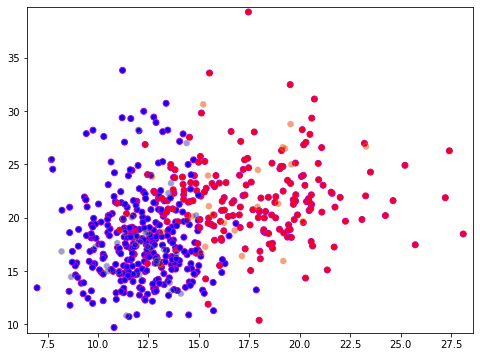

In [6]:
X = dataset.data
y = dataset.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))

# Rysowanie danych treningowych
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
#            edgecolor='k')

# Rysowanie punktów należacych do zbioru treningowego
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='m')
        # Rysowanie punktów należacych do zbioru testowego
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='y', alpha=0.4)


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


Patrząc na wykres reprzentacji klas należacych do zbioru danych przedstawionych na płaszczyźnie można łatwo zauważyć, iż idealna separacja klas z wykorzystaniem prostej linii separucjącej może być niemożliwa. Wykorzystamy klasyfikator oparty o SVM z jądrem liniowym.
Klasyfikator został zaimportowany z użyciem biblioteki scikit-learn.
Poniżej pokazano komendę odpowiedzialną za import klasyfikatora. Jak widać istnieje kilka parametrów, które należy wpisać. Pierwszy z nich jest rodzaj jądra czyli kernel. Do wyboru jest kilka opcji, zaczynąc od najprosztszego czyli linowego ukrywająceog się pod nazwą "linear", poprzez jądra wielomianowe "poly" czy czy też funkcję rbf czyli "rbf". Oprócz tego istnieją inne istotne parametry takie jak współczynnik C odpowiadający za określenie wektorów nośnych oraz lini separującej i marginesu.


```
clf = svm.SVC(kernel='linear', C=1 )
```

Pełna dokumentacja funkcji znajduje się na stronie:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

Dodatkowo do sprawdzenia jakości modelu wykorzystamy miarę Accuracy, która powinna być państwu znana. Dla przypomnienia, jest to stosunek poprwnie dokonanych klasyfikacji do wszystkich dokonanych klasyfikacji. 
<p>Gdyby zapisać to za pomocą wzoru otrzymamy:<p>
$$ Accuracy = \frac {True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative} $$
Oprócz tego wykorzystane zostaną dwie inne miary: Precision oraz Recall.
Precision jest definowana jako stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych. <p>Zapisując to we wzorze otrzymamy:<p>
$$ Precision = \frac {True Positive}{True Positive + False Positive} $$
<p>
Podobnie w przypadku miary Recall, która jest stosunkiem wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych.<p>
<p>Zapisując to za pomocą wzoru otrzymamy:<p>
$$ Recall = \frac {True Positive}{True Positive + False Negative} $$

In [ ]:
#Inicjalizacja klasyfikatora bazującego na SVM
clf = svm.SVC(kernel='rbf')#,probability=True) # kernel - opcje: rbf - domyślna, linear -linioye, poly - wielomianowe, dodatkowy parametr degree oznaczający stopień wielomianu
#Trening modelu z wykorzystaniem danych treningowych 
clf.fit(X_train, y_train)
#Predykcja odpowiedzi modelu na dane testowe 
y_pred = clf.predict(X_test)
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Miara accuracy:",metrics.accuracy_score(y_test, y_pred))
y_score = clf.decision_function(X_test)
# Obliczenia wartości miary precison dla modelu: (precision to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precision dla wytrenowanego modelu:",metrics.precision_score(y_test, y_pred))
# Obliczenia wartości miary recall dla modelu: (recall to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test, y_pred))

Dokładność: 0.9473684210526315
Wartość miary precission dla wytrenowanego modelu: 0.9210526315789473
Wartość miary recall dla wytrenowanego modelu: 1.0


Aby sprawdzić dokładnie jak wyglądała klasyfikacja i gdzie nastąpiły pomyłki wykorzystuje się macierz pomyłek. Poniżej pokazano kod pozwalający na graficzna interpretację wyników z wykorzystaniem macierzy pomyłek.

Text(0.5, 257.44, 'Etykieta przewidziana przez model')

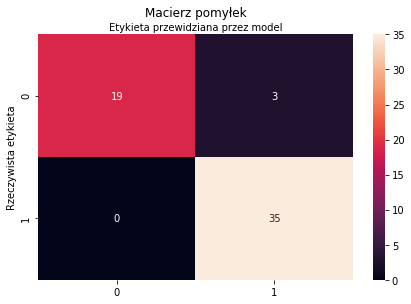

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Spróbujmy teraz wykorzystać inne jądro i sprawdzimy czy wpłynie to na wyniki klasyfikacji. Tym razem wykorzystane zostanie jądro Radial Baisis Function.

In [ ]:
#Inicjalizacja klasyfikatora bazującego na SVM
clf = svm.SVC(kernel='rbf', C=100)#,probability=True) # kernel - opcje: rbf - domyślna, linear -linioye, poly - wielomianowe, dodatkowy parametr degree oznaczający stopień wielomianu
#Trening modelu z wykorzystaniem danych treningowych 
clf.fit(X_train, y_train)
#Predykcja odpowiedzi modelu na dane testowe 
y_pred = clf.predict(X_test)
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Miara accuracy:",metrics.accuracy_score(y_test, y_pred))
y_score = clf.decision_function(X_test)
# Obliczenia wartości miary precison dla modelu: (precision to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precision dla wytrenowanego modelu:",metrics.precision_score(y_test, y_pred))
# Obliczenia wartości miary recall dla modelu: (recall to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test, y_pred))

Dokładność: 0.9824561403508771
Wartość miary precision dla wytrenowanego modelu: 0.9722222222222222
Wartość miary recall dla wytrenowanego modelu: 1.0


Text(0.5, 257.44, 'Etykieta przewidziana przez model')

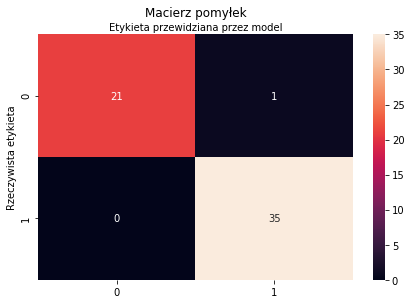

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Udało się trochę poprawić wyniki klasyfikacji, natomiast jeszcze nie udało się uzyskać 100%. 

Wykorzystamy teraz inną funkcję znajdująca sie w pakiecie scikit-learn do zaimplementowania klasyfikatora typu SVM. Użyte zostanie jądro liniowe i funkcja straty "hinge".



```
svm_clf = Pipeline ([
                     ("scaler", StandardScaler()),
                     ("linear_svc",LinearSVC(C=1, loss="hinge")),
])
```


Dodatkowo dokonano przekształcenia na danych - zostały one przeskalowane z użyciem funkcji StandardScaler. Funkcja ta standaryzuje dane, usuwając średnią i skalując je do wariancji jednostkowej

Funkcję oblicza się jako:
$$ z= \frac{(x-u)} {s}  $$

gdzie
zmienna *u* jest rozumiana jako średnia wartość ze zbioru treningowego natomiast *s* jest to odchylenie standardowe wartości ze zbioru treningowego, natomiast *x* to oryginalna wartość ze zbioru treningowego.

In [ ]:
svm_clf = Pipeline ([
                     ("scaler", StandardScaler()),
                     ("linear_svc",LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X_train,y_train)
y_pred_svm = svm_clf.predict(X_test)
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Miara accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
y_score = svm_clf.decision_function(X_test)
# Obliczenia wartości miary precison dla modelu: (precision to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precision dla wytrenowanego modelu:",metrics.precision_score(y_test,y_pred_svm))
# Obliczenia wartości miary recall dla modelu: (recall to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test, y_pred_svm))

Miara accuracy: 1.0
Wartość miary precision dla wytrenowanego modelu: 1.0
Wartość miary recall dla wytrenowanego modelu: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 257.44, 'Etykieta przewidziana przez model')

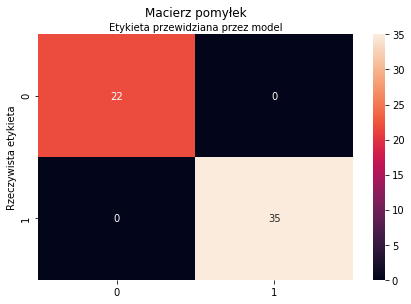

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Jak widać pomimo zastosowania liniowego klasyfikatora SVM udało się uzyskać 100% skuteczności. Jest to zasługa zastosowania standaryzacji danych poprzez ich skalowanie. Wbrew pozorom skalowanie danych pozwala na poprawienie wyników klasyfikacji.

Uważny obserwator zauważy pewną nieścisłość. Dlaczego miara Accuracy na rysunku nie zgadza się z tą wyświetloną pod rysunkiem

Text(0.5, 257.44, 'Etykieta przewidziana przez model')

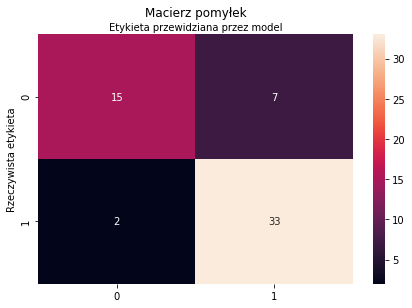

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

In [ ]:
#Inicjalizacja klasyfikatora bazującego na SVM
clf = svm.SVC(kernel='linear',  decision_function_shape='ovo')#,probability=True) # kernel - opcje: rbf - domyślna, linear -linioye, poly - wielomianowe, dodatkowy parametr degree oznaczający stopień wielomianu
#Trening modelu z wykorzystaniem danych treningowych 
clf.fit(X_train, y_train)
#Predykcja odpowiedzi modelu na dane testowe 
y_pred = clf.predict(X_test)
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Dokładność:",metrics.accuracy_score(y_test, y_pred))
y_score = clf.decision_function(X_test)
# Obliczenia wartości miary precisson dla modelu: (precission to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precission dla wytrenowanego modelu:",metrics.precision_score(y_test, y_pred))
# Obliczenia wartości miary recall dla modelu: (recal to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test, y_pred))

Dokładność: 0.9649122807017544
Wartość miary precission dla wytrenowanego modelu: 0.9714285714285714
Wartość miary recall dla wytrenowanego modelu: 0.9714285714285714


Text(0.5, 257.44, 'Etykieta przewidziana przez model')

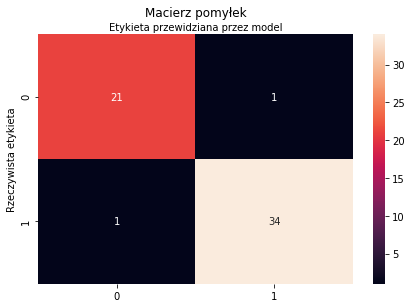

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

In [ ]:
#Inicjalizacja klasyfikatora bazującego na SVM
clf = svm.SVC(kernel='linear',  decision_function_shape='ovr')#,probability=True) # kernel - opcje: rbf - domyślna, linear -linioye, poly - wielomianowe, dodatkowy parametr degree oznaczający stopień wielomianu
#Trening modelu z wykorzystaniem danych treningowych 
clf.fit(X_train, y_train)
#Predykcja odpowiedzi modelu na dane testowe 
y_pred = clf.predict(X_test)
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Dokładność:",metrics.accuracy_score(y_test, y_pred))
y_score = clf.decision_function(X_test)
# Obliczenia wartości miary precisson dla modelu: (precission to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precission dla wytrenowanego modelu:",metrics.precision_score(y_test, y_pred))
# Obliczenia wartości miary recall dla modelu: (recal to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test, y_pred))

Dokładność: 0.9649122807017544
Wartość miary precission dla wytrenowanego modelu: 0.9714285714285714
Wartość miary recall dla wytrenowanego modelu: 0.9714285714285714


Text(0.5, 257.44, 'Etykieta przewidziana przez model')

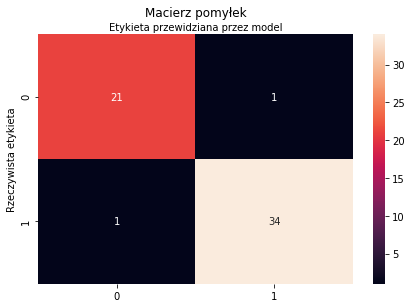

In [ ]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

<p><b>Zadanie 1</b></p>

Bazując na powyższym przykładzie sprawdzić jak będzie działał SVM implementowany przy użyciu `svm.SVC()` z innymi nastawami - zmienić rodzaj jądra oraz jego stopień i wskazać wpływ na metryki accuracy, preccison i recall. W przypadku jądra rbf wykorzystać współczynnik *gamma*. Wybrać najlepsze nastawy i wykorzystać je w Zadaniu 2.

<p><b>Zadanie 2</b></p>
<p>Zmienić podział zbioru danych co 10% zaczynając od podziału 10% danych treningowych - 90% danych testowych. Czy widać znaczącą różnicę w wynikach metryk accuracy, preccison i recall?  Dla jakich wartośći uzyskano optymalne wyniki? Czy zaobserwowano zjawisko underfittingu i overfittingu? Jeśli tak to w jaki sposób się ono objawiało?

<p><b>Zadanie 3</b></p>

Wykorzystując *Pipeline* i *StandardScaler()* przeprowadzić ponownie dobór hiperparametrów dla różnych funkcji jądra. Porównać otrzymane wyniki z wynikami z zadania pierwszego.
